In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as hr
import dionysus as d
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from src.tda import ClutchMapper, visualize_complex
from src.data_pipeline import query_avg
import plotly.plotly as py

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 1000)

plt.style.use('ggplot')

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

In [30]:
df = query_avg("HAVING position = 'WR'")
df = df[:80]

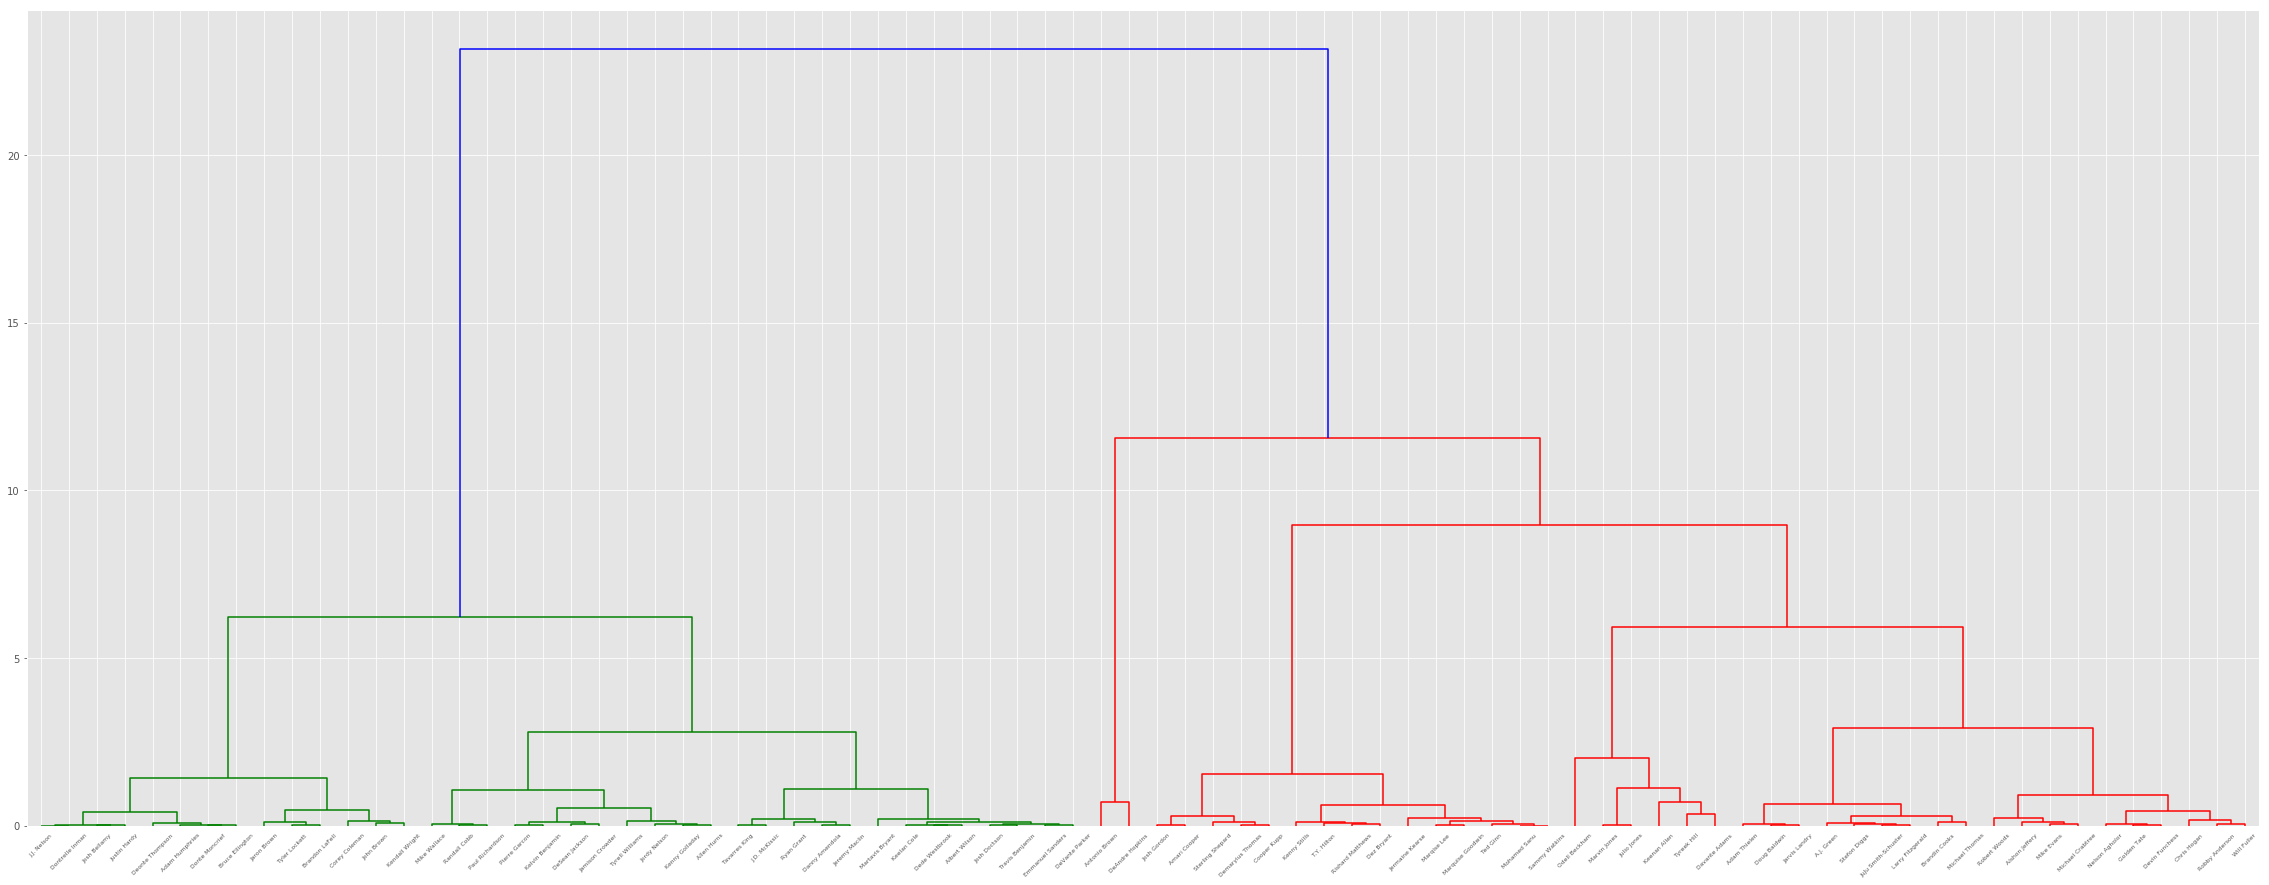

In [31]:
X = df['avg_points'].values.reshape(-1,1)
dist_vector = pdist(X, metric='euclidean')
linkage_mat = hr.linkage(dist_vector, method='ward')
plt.figure(figsize=(40,15));
dendrogram = hr.dendrogram(linkage_mat, labels=df['name'].values);
plt.xticks(rotation=45);
plt.savefig('../plots/dendrogram_ward_linkage_wr')

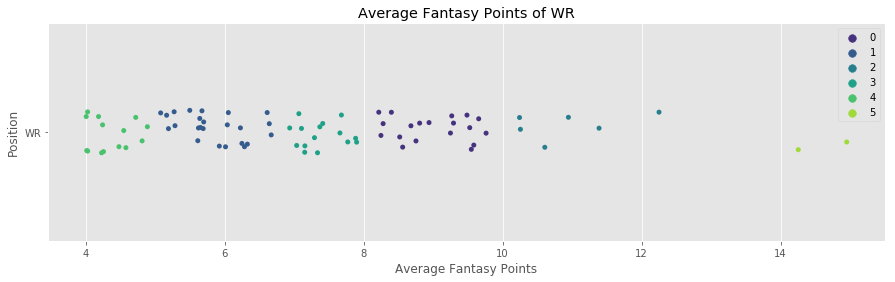

In [35]:
agg = AgglomerativeClustering(n_clusters=6, linkage='ward')
labels = agg.fit_predict(X)

plt.figure(figsize=(15,4));
plt.title('Average Fantasy Points of WR');
sns.stripplot(x="avg_points", y="pos", data=df, hue=labels, palette='viridis', jitter=True);
plt.xlabel('Average Fantasy Points');
plt.ylabel('Position');

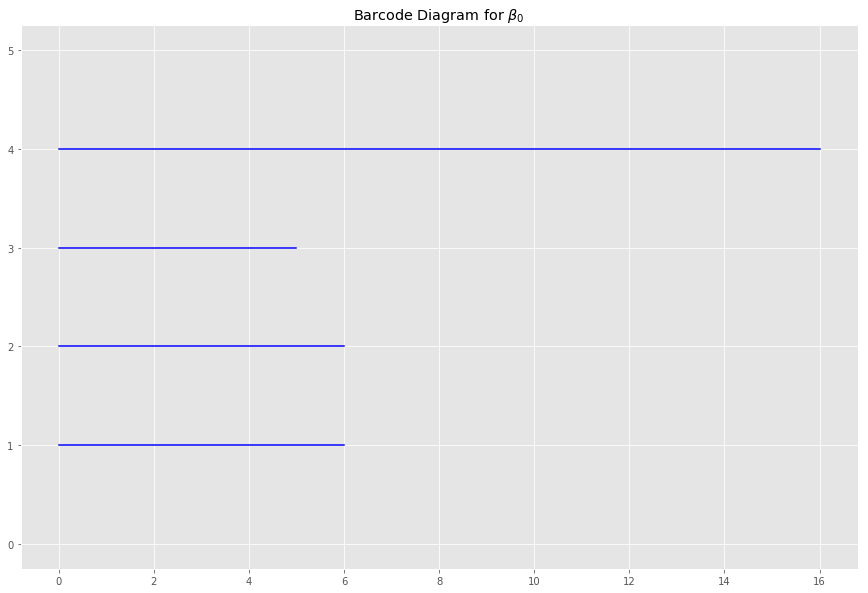

In [36]:
stats = df.iloc[:,4:].values

scaler = MinMaxScaler()
scaled_stats = scaler.fit_transform(stats)

cmapper = ClutchMapper()
cmapper.fit(scaled_stats, labels)

f = cmapper.build_filtration()

ph = d.homology_persistence(f)
dgms = d.init_diagrams(ph, f)

plt.figure(figsize=(15,10));
plt.title('Barcode Diagram for $\\beta_0$');
d.plot.plot_bars(dgms[0], show = True)

In [46]:
wr_complex = cmapper.build_complex(70)

fig = visualize_complex(wr_complex, 'WR Complex')
iplot(fig, filename='wr_complex')

Here 9, and 10 seem to be significantly different.

In [7]:
col_list = ['name']

for col in df.columns[3:]:
    if df[col].max() > 0:
        col_list.append(col)

In [47]:
df['label'] = labels
df.loc[df['label'] == 5, col_list]

,name,avg_points,avg_passing_attempts,avg_passing_completions,avg_incomplete_passes,avg_passing_yards,avg_passing_touchdowns,avg_interceptions_thrown,avg_rushing_attempts,avg_rushing_yards,avg_rushing_touchdowns,avg_receptions,avg_receiving_yards,avg_receiving_touchdowns,avg_kickoff_and_punt_return_yards,avg_kickoff_and_punt_return_touchdowns,avg_fumble_recovered_for_td,avg_fumbles_lost,avg_fumble,avg_2_point_conversions,avg_tackle,avg_assisted_tackles,avg_defense_interception,avg_forced_fumble,avg_fumbles_recovery,avg_touchdown_fumble_return,avg_pass_defended,avg_interception_return_yards,avg_fumble_return_yards
0,Antonio Brown,14.950000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.214286,109.500000,0.642857,4.357143,0.0,0.0,0.000000,0.285714,0.071429,0.000000,0.000000,0.0,0.0,0.071429,0.0,0.0,0.0,0.0
1,DeAndre Hopkins,14.253333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.400000,91.866667,0.866667,0.000000,0.0,0.0,0.066667,0.066667,0.000000,0.133333,0.066667,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


These guys are obviously high performers even amongst the WR1 tier.

In [48]:
df.loc[df['label'] == 4, col_list]

,name,avg_points,avg_passing_attempts,avg_passing_completions,avg_incomplete_passes,avg_passing_yards,avg_passing_touchdowns,avg_interceptions_thrown,avg_rushing_attempts,avg_rushing_yards,avg_rushing_touchdowns,avg_receptions,avg_receiving_yards,avg_receiving_touchdowns,avg_kickoff_and_punt_return_yards,avg_kickoff_and_punt_return_touchdowns,avg_fumble_recovered_for_td,avg_fumbles_lost,avg_fumble,avg_2_point_conversions,avg_tackle,avg_assisted_tackles,avg_defense_interception,avg_forced_fumble,avg_fumbles_recovery,avg_touchdown_fumble_return,avg_pass_defended,avg_interception_return_yards,avg_fumble_return_yards
66,John Brown,4.890000,0.0,0.0,0.0,0.0,0.0,0.0,0.100000,1.000000,0.0,2.100000,29.900000,0.300000,0.000000,0.0000,0.0,0.0000,0.000000,0.0,0.000000,0.0000,0.0,0.0000,0.000000,0.0,0.0,0.0,0.000000
67,Kendall Wright,4.814286,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,4.214286,43.857143,0.071429,0.000000,0.0000,0.0,0.0000,0.000000,0.0,0.071429,0.0000,0.0,0.0000,0.000000,0.0,0.0,0.0,0.000000
68,Corey Coleman,4.722222,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,2.555556,33.888889,0.222222,0.000000,0.0000,0.0,0.0000,0.000000,0.0,0.111111,0.0000,0.0,0.0000,0.000000,0.0,0.0,0.0,0.000000
69,Tyler Lockett,4.581250,0.0,0.0,0.0,0.0,0.0,0.0,0.625000,3.625000,0.0,2.812500,34.687500,0.125000,74.125000,0.0625,0.0,0.0000,0.000000,0.0,0.062500,0.0000,0.0,0.0000,0.000000,0.0,0.0,0.0,0.000000
70,Brandon LaFell,4.550000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,3.250000,34.250000,0.187500,0.000000,0.0000,0.0,0.0000,0.062500,0.0,0.062500,0.0000,0.0,0.0000,0.000000,0.0,0.0,0.0,0.000000
71,Jaron Brown,4.481250,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1.937500,29.812500,0.250000,0.000000,0.0000,0.0,0.0000,0.000000,0.0,0.375000,0.0625,0.0,0.0000,0.062500,0.0,0.0,0.0,0.000000
72,Donte Moncrief,4.258333,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,2.166667,32.583333,0.166667,0.000000,0.0000,0.0,0.0000,0.000000,0.0,0.166667,0.0000,0.0,0.0000,0.000000,0.0,0.0,0.0,0.000000
73,Bruce Ellington,4.245455,0.0,0.0,0.0,0.0,0.0,0.0,0.272727,1.545455,0.0,2.636364,30.000000,0.181818,4.272727,0.0000,0.0,0.0000,0.090909,0.0,0.090909,0.0000,0.0,0.0000,0.181818,0.0,0.0,0.0,0.363636
74,Adam Humphries,4.231250,0.0,0.0,0.0,0.0,0.0,0.0,0.062500,0.375000,0.0,3.812500,39.437500,0.062500,3.062500,0.0000,0.0,0.0625,0.062500,0.0,0.312500,0.0000,0.0,0.0625,0.000000,0.0,0.0,0.0,0.000000
75,Deonte Thompson,4.187500,0.0,0.0,0.0,0.0,0.0,0.0,0.125000,-0.312500,0.0,2.375000,34.687500,0.125000,14.312500,0.0000,0.0,0.0000,0.062500,0.0,0.000000,0.0000,0.0,0.0000,0.000000,0.0,0.0,0.0,0.000000


In [49]:
df.loc[df['label'].isin([0,1,2,3,6,7,8,9,10,11,12,13]), col_list]

,name,avg_points,avg_passing_attempts,avg_passing_completions,avg_incomplete_passes,avg_passing_yards,avg_passing_touchdowns,avg_interceptions_thrown,avg_rushing_attempts,avg_rushing_yards,avg_rushing_touchdowns,avg_receptions,avg_receiving_yards,avg_receiving_touchdowns,avg_kickoff_and_punt_return_yards,avg_kickoff_and_punt_return_touchdowns,avg_fumble_recovered_for_td,avg_fumbles_lost,avg_fumble,avg_2_point_conversions,avg_tackle,avg_assisted_tackles,avg_defense_interception,avg_forced_fumble,avg_fumbles_recovery,avg_touchdown_fumble_return,avg_pass_defended,avg_interception_return_yards,avg_fumble_return_yards
2,Odell Beckham,12.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,2.000000,0.000000,6.250000,75.500000,0.750000,5.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.000000,0.0000,0.0000,0.0,0.0000
3,Keenan Allen,11.387500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.562500,0.000000,6.375000,87.062500,0.375000,0.000000,0.000000,0.0625,0.000000,0.062500,0.000000,0.062500,0.0000,0.0625,0.0000,0.062500,0.0625,0.0625,2.0,1.6875
4,Tyreek Hill,10.946667,0.066667,0.000000,0.066667,0.000000,0.000000,0.066667,1.133333,3.933333,0.000000,5.000000,78.866667,0.466667,13.600000,0.066667,0.0000,0.000000,0.133333,0.000000,0.066667,0.0000,0.0000,0.0000,0.133333,0.0000,0.0000,0.0,0.0000
5,Davante Adams,10.607143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.285714,63.214286,0.714286,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.000000,0.0000,0.0000,0.0,0.0000
6,Marvin Jones,10.256250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.812500,68.812500,0.562500,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.000000,0.0000,0.0000,0.0,0.0000
7,Julio Jones,10.243750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.937500,0.000000,5.500000,90.250000,0.187500,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.062500,0.0000,0.0000,0.0000,0.000000,0.0000,0.0000,0.0,0.0000
8,Brandin Cooks,9.762500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.562500,2.500000,0.000000,4.062500,67.625000,0.437500,0.000000,0.000000,0.0000,0.000000,0.000000,0.062500,0.062500,0.0000,0.0000,0.0000,0.000000,0.0000,0.0000,0.0,0.0000
9,Michael Thomas,9.656250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.500000,77.812500,0.312500,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.312500,0.0000,0.0000,0.0000,0.000000,0.0000,0.0000,0.0,0.0000
10,Stefon Diggs,9.585714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.571429,0.928571,0.000000,4.571429,60.642857,0.571429,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.142857,0.0000,0.0000,0.0000,0.000000,0.0000,0.0000,0.0,0.0000
11,JuJu Smith-Schuster,9.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.142857,65.500000,0.500000,17.142857,0.071429,0.0000,0.000000,0.000000,0.000000,0.285714,0.0000,0.0000,0.0000,0.000000,0.0000,0.0000,0.0,0.0000


In [13]:
wr_complex

[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9]]